# 非線型Leslieモデル

\begin{equation}
    f(x, r) = \begin{pmatrix}
        r (x_1 + x_2) e^{-0.1(x_1 + x_2)} \\ x_1
    \end{pmatrix},\quad x = (x_1, x_2)
\end{equation}

In [1]:
import numpy as np
import pathfollowing as pf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

In [2]:
def func(x, a):
    return np.array([a[0] * (x[0] + x[1]) * np.exp(-0.1*(x[0]+x[1])) , x[0]])

def dfdx(x,a):
    return np.array([[ a[0]*np.exp(-0.1*(x[0]+x[1]))*(1.0 - 0.1*(x[0]+x[1])),a[0]*np.exp(-0.1*(x[0]+x[1]))*(1.0 - 0.1*(x[0]+x[1]))], [1.0, 0.0]])

def dfda(x,a):
    return np.array([(x[0] + x[1]) * np.exp(-0.1*(x[0]+x[1])), 0.0])

安定な3周期点をみつける

In [3]:
x = np.array([1.0,1.0])
a = np.array([10.05])
for m in range(100):
    x = func(x, a)
    if m > 90:
        print(x)

[36.05632191  6.20482028]
[ 6.20482028 36.05632191]
[6.20482028 6.20482028]
[36.05632191  6.20482028]
[ 6.20482028 36.05632191]
[6.20482028 6.20482028]
[36.05632191  6.20482028]
[ 6.20482028 36.05632191]
[6.20482028 6.20482028]


In [4]:
print(x)

[6.20482028 6.20482028]


3周期点の追跡

In [5]:
a=np.array([10.05])
bd,bp,lp,pd=pf.pathfollow(x, a, func, dfdx, dfda,nmax=300, h=0.05, epsr=1.0e-10, epsb=1.0e-10, amin=10.0,amax=20.0,problem='map', quiet=True, period=3)

# parameter arrived at boundary


周期倍分岐点が検出されている

In [6]:
bd[pd[0]]

{'TY': 'P',
 'x': array([3.65039653, 3.65039653]),
 'a': array([14.10442894]),
 'v': array([-0.29740519, -0.29740519,  0.90724876]),
 'udim': 1,
 'phi': array([0.76603973, 0.64279322, 0.        ])}

周期6の周期点の枝に切り替える

In [7]:
v2 = pf.calcSwitchingVectorPD(bd[pd[0]], func, dfdx, dfda, period=6)
x2=bd[pd[0]]['x']
a2=bd[pd[0]]['a']
bd2,bp2,lp2, pd2=pf.pathfollow(x2, a2, func, dfdx, dfda, w=v2, nmax=400, h=0.025, epsr=1.0e-10, epsb=1.0e-10, amin=10.0,amax=20.0,problem='map', quiet=True,period=6)

# parameter arrived at boundary


周期倍分岐点が検出されている

In [8]:
bd2[pd2[0]]

{'TY': 'P',
 'x': array([4.78940195, 6.76800969]),
 'a': array([15.87450444]),
 'v': array([0.1617148 , 0.72556074, 0.66888709]),
 'udim': 1,
 'phi': array([0.47744832, 0.87865984, 0.        ])}

周期12の周期点の枝に切り替える

In [9]:
v4 = pf.calcSwitchingVectorPD(bd2[pd2[0]], func, dfdx, dfda, period=12)
x4=bd2[pd2[0]]['x']
a4=bd2[pd2[0]]['a']
bd4,bp4,lp4, pd4=pf.pathfollow(x4, a4, func, dfdx, dfda, w=v4, nmax=800, h=0.0125, epsr=1.0e-10, amin=10.0,amax=20.0,epsb=1.0e-12, problem='map', quiet=True,period=12)

# parameter arrived at boundary


In [10]:
print(bd4[pd4[0]])

{'TY': 'P', 'x': array([4.29483468, 5.3470061 ]), 'a': array([16.31060259]), 'v': array([-0.338017  , -0.77613659,  0.53231241]), 'udim': 1, 'phi': array([0.93722738, 0.34871886, 0.        ])}


周期24

In [11]:
v8 = pf.calcSwitchingVectorPD(bd4[pd4[0]], func, dfdx, dfda, period=24)
x8=bd4[pd4[0]]['x']
a8=bd4[pd4[0]]['a']
bd8,bp8,lp8, pd8=pf.pathfollow(x8, a8, func, dfdx, dfda, w=v8, nmax=1600, h=0.00625, epsr=1.0e-10, amin=10.0,amax=20.0,epsb=1.0e-12, problem='map', quiet=True,period=24)

# parameter arrived at boundary


In [12]:
print(bd[pd[0]]['a'], bd2[pd2[0]]['a'], bd4[pd4[0]]['a'], bd8[pd8[0]]['a'])

[14.10442894] [15.87450444] [16.31060259] [16.40625687]


In [13]:
bd_r = np.array([bd[m]['a'][0] for m in range(len(bd))])
bd_x = np.array([bd[m]['x'][0] for m in range(len(bd))])
bd_r2 = np.array([bd2[m]['a'][0] for m in range(len(bd2))])
bd_x2 = np.array([bd2[m]['x'][0] for m in range(len(bd2))])
bd_r4 = np.array([bd4[m]['a'][0] for m in range(len(bd4))])
bd_x4 = np.array([bd4[m]['x'][0] for m in range(len(bd4))])
bd_r8 = np.array([bd8[m]['a'][0] for m in range(len(bd8))])
bd_x8 = np.array([bd8[m]['x'][0] for m in range(len(bd8))])

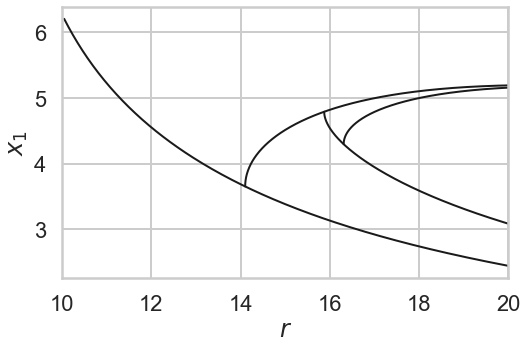

In [14]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.set_xlim(10,20)
ax.set_xlabel("$r$")
ax.set_ylabel("$x_1$")
ax.plot(bd_r ,bd_x, '-k')
ax.plot(bd_r2,bd_x2, '-k')
ax.plot(bd_r4,bd_x4, '-k')
ax.plot(bd_r8,bd_x8, '-k')
# plt.savefig("bd_leslie.pdf", bbox_inches='tight')